In [20]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression  # LR
from sklearn import svm # SVM
from sklearn.ensemble import RandomForestClassifier # RF
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB # NB
from sklearn.tree import DecisionTreeClassifier # DT
from sklearn.model_selection import train_test_split # training and testing data split
from sklearn import metrics # accuracy measure
from sklearn.metrics import confusion_matrix # for confusion matrix

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RandomizedLogisticRegression as RLR
import pandas as pd
import numpy as np
import warnings
from sklearn import metrics  
from sklearn.svm import SVC 
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV     #用pipline结合GridSearchCV，找到分数最高的保留特征数
from sklearn import preprocessing
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
f = open('finaldata.csv')
data = pd.read_csv(f)

In [3]:
#data['类别'].value_counts().to_frame().style.background_gradient(cmap='summer')

In [4]:
data.loc[data['类别']=='棋牌游戏','类别'] = '益智休闲'
data.loc[data['类别']=='音乐游戏','类别'] = '益智休闲'
data.loc[data['类别']=='策略塔防','类别'] = '益智休闲'
data.loc[data['类别']=='冒险解谜','类别'] = '益智休闲'
data.loc[data['类别']=='射击游戏','类别'] = '动作竞争'
data.loc[data['类别']=='格斗游戏','类别'] = '动作竞争'
data.loc[data['类别']=='竞速游戏','类别'] = '动作竞争'
data.loc[data['类别']=='体育运动','类别'] = '动作竞争'
data.loc[data['类别']=='飞行游戏','类别'] = '动作竞争'
data.loc[data['类别']=='动作游戏','类别'] = '动作竞争'
data.loc[data['类别']=='角色扮演','类别'] = '扮演模拟工具'
data.loc[data['类别']=='模拟经营','类别'] = '扮演模拟工具'
data.loc[data['类别']=='养成游戏','类别'] = '扮演模拟工具'
data.loc[data['类别']=='游戏工具','类别'] = '扮演模拟工具'
#data['类别'].value_counts().to_frame().style.background_gradient(cmap='summer') #506，442，192

In [5]:
data1 = pd.get_dummies(data,columns=['类别'])

In [6]:
data1.columns

Index(['Unnamed: 0', '游戏名称', '评分', '语言', '热度', '最后更新时间', '游戏版本', '资费', '开发商',
       '支持系统', '评论数', '喜欢数', '开发游戏个数', 'isdata', 'score', 'Chinese', 'English',
       'Japanese', 'Korean', 'heat', 'year', 'month', 'day', 'pay', 'system',
       'containGames', 'gameversion', '类别_动作竞争', '类别_扮演模拟工具', '类别_益智休闲'],
      dtype='object')

In [7]:
data2=data1[~data1['评分'].isna()]
#data1['评论数'].corr(data1['喜欢数'])#0.6588566806607459  # 热度和评论数：0.436644
y = data2.score
x = data2.drop(['score','游戏名称','评分','语言','热度','最后更新时间','游戏版本','资费','开发商','支持系统'] , axis=1)

In [8]:
y.shape

(938,)

In [9]:
X=data1.drop('score',axis=1)
Y=data1.score

In [10]:
def logic_choose_train(a, b): #提取特征
    from sklearn.linear_model import RandomizedLogisticRegression as RLR 
    RLR = RLR()
    RLR.fit(a, b)
    RLR.get_support()
    print('有效特征为：{}'.format(','.join(a.columns[RLR.get_support()])))
    x = a[a.columns[RLR.get_support()]]
    return x
logic_choose_train(x, y).head()

有效特征为：评论数,喜欢数,开发游戏个数,isdata


,评论数,喜欢数,开发游戏个数,isdata
0,6654,114,9,0
1,16190,3712,9,0
2,7187,280,4,0
3,9372,1608,1,0
4,8804,888,5,0


In [11]:
def train_test(data2): 
    data2['is_train'] = np.random.uniform(0,1,len(data1)) <=0.8
    train,test = data2[data2['is_train']==True],data2[data2['is_train']==False] # 拆分训练集：测试集 = 4:1
    train_y = train.score.as_matrix() #x，y统一为numpy.ndarray
    tra_x = train.loc[:,['评论数','喜欢数','开发游戏个数','isdata']]
    train_x = preprocessing.scale(tra_x)   #数据标准化
    test_y = test.score.as_matrix()
    te_x = test.loc[:,['评论数','喜欢数','开发游戏个数','isdata']]
    test_x = preprocessing.scale(te_x)
    return train_x, train_y, test_x, test_y
train_x, train_y, test_x, test_y = train_test(data1)

In [12]:
x = data1.loc[:,['评论数','喜欢数','开发游戏个数','isdata']]
x = preprocessing.scale(x)   #数据标准化

In [13]:
y = data1.score.as_matrix()

In [14]:
x.shape

(1140, 4)

# 1 LR

In [29]:
model = LogisticRegression(class_weight='balanced')    #样本是失衡的
model.fit(train_x, train_y) 
predict = model.predict(test_x)
precision = metrics.precision_score(test_y, predict) 
recall = metrics.recall_score(test_y, predict)
print('precision: %.2f%%, recall: %.2f%%' % (100 * precision, 100 * recall))
accuracy = metrics.accuracy_score(test_y, predict) 
print('accuracy: %.2f%%' % (100 * accuracy))

precision: 71.25%, recall: 70.37%
accuracy: 81.35%


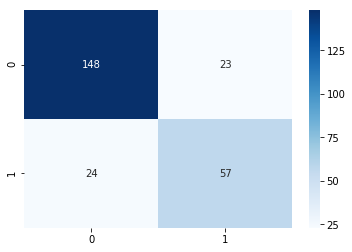

In [30]:
#ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
#result=cross_val_predict(ada,x,y,cv=10)
sns.heatmap(confusion_matrix(test_y,predict),cmap='Blues',annot=True,fmt='2.0f')
plt.show()

In [31]:
from sklearn.metrics import roc_curve, auc  ###计算roc和auc

<Figure size 432x288 with 0 Axes>

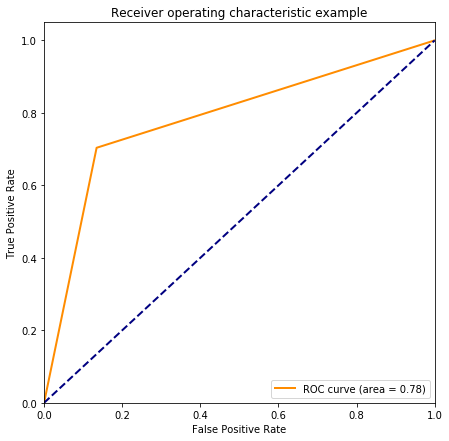

In [32]:
fpr,tpr,threshold = roc_curve(test_y, predict) ###计算真正率和假正率
roc_auc = auc(fpr,tpr)   ###计算auc的值
 
plt.figure()
lw = 2
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [35]:
import scikitplot as skplt
import matplotlib.pyplot as plt

#y_true = # ground truth labels
#y_probas = # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(test_y, predict)
plt.show()

ModuleNotFoundError: No module named 'scikitplot'

No handles with labels found to put in legend.


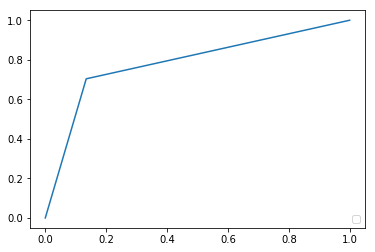

In [37]:
fpr, tpr, _ = metrics.roc_curve(test_y, predict)
auc = metrics.roc_auc_score(test_y, predict)
plt.plot(fpr,tpr)
plt.legend(loc=4)
plt.show()

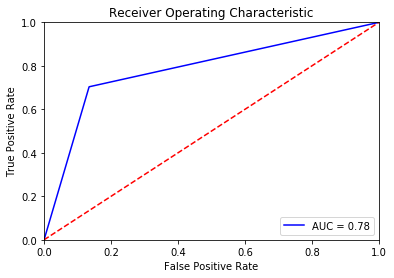

In [34]:
# calculate the fpr and tpr for all thresholds of the classification
#probs = model.predict_proba(X_test)
#preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_y, predict)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [121]:
47/(47+28)

0.6266666666666667

# 2 SVM

In [27]:
# SVM Classifier 
#model_SVM = SVC(kernel='rbf', probability=True)#rbf高斯kernel
model_SVM  = SVC(C=0.5, kernel='linear', decision_function_shape='ovr')#线性的效果最好
#smodel_SVM = SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
model_SVM.fit(train_x, train_y)
predict_SVM = model_SVM.predict(test_x)
precision_SVM = metrics.precision_score(test_y, predict_SVM) 
recall_SVM = metrics.recall_score(test_y, predict_SVM)
print('precision: %.2f%%, recall: %.2f%%' % (100 * precision_SVM, 100 * recall_SVM))
accuracy_SVM = metrics.accuracy_score(test_y, predict_SVM) 
print('accuracy: %.2f%%' % (100 * accuracy_SVM))

precision: 91.43%, recall: 39.51%
accuracy: 79.37%


<Figure size 432x288 with 0 Axes>

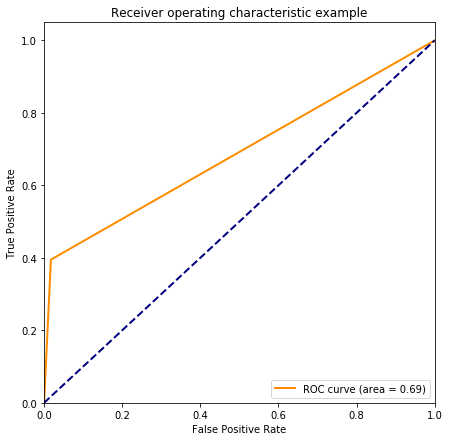

In [28]:
fpr,tpr,threshold = roc_curve(test_y, predict_SVM) ###计算真正率和假正率
roc_auc = auc(fpr,tpr)   ###计算auc的值
 
plt.figure()
lw = 2
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# 3 DT

In [16]:
model=DecisionTreeClassifier()
model.fit(train_x,train_y)
prediction4=model.predict(test_x)

precision = metrics.precision_score(test_y,prediction4)
recall = metrics.recall_score(test_y,prediction4)
accuracy = metrics.accuracy_score(test_y,prediction4)
print('precision:%.2f%%,recall:%.2f%%'%(100*precision,100*recall))
print('accuracy:%.2f%%'%(100*accuracy))

precision:60.00%,recall:52.00%
accuracy:73.39%


# 4 KNN

In [17]:
model=KNeighborsClassifier()
model.fit(train_x,train_y)
prediction5=model.predict(test_x)

precision = metrics.precision_score(test_y,prediction5)
recall = metrics.recall_score(test_y,prediction5)
accuracy = metrics.accuracy_score(test_y,prediction5)
print('precision:%.2f%%,recall:%.2f%%'%(100*precision,100*recall))
print('accuracy:%.2f%%'%(100*accuracy))

precision:79.63%,recall:57.33%
accuracy:81.55%


In [20]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(train_x,train_y)
prediction5=model.predict(test_x)

precision = metrics.precision_score(test_y,prediction5)
recall = metrics.recall_score(test_y,prediction5)
accuracy = metrics.accuracy_score(test_y,prediction5)
print('precision:%.2f%%,recall:%.2f%%'%(100*precision,100*recall))
print('accuracy:%.2f%%'%(100*accuracy))

precision:79.63%,recall:57.33%
accuracy:81.55%


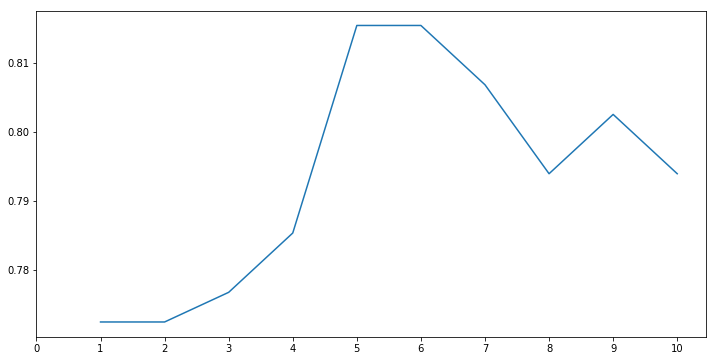

In [19]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_x,train_y)
    prediction=model.predict(test_x)
    a=a.append(pd.Series(metrics.accuracy_score(test_y,prediction)))

plt.plot(a_index,a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()


In [21]:
a.values.max()

0.8154506437768241

# 5 NB

In [22]:
model=GaussianNB()
model.fit(train_x,train_y)
prediction6=model.predict(test_x)
#print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))



precision = metrics.precision_score(test_y,prediction6)
recall = metrics.recall_score(test_y,prediction6)
accuracy = metrics.accuracy_score(test_y,prediction6)
print('precision:%.2f%%,recall:%.2f%%'%(100*precision,100*recall))
print('accuracy:%.2f%%'%(100*accuracy))

precision:75.47%,recall:53.33%
accuracy:79.40%


# 6 LDA

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(train_x,train_y)
print('Accuracy of LDA classifier on training set: {:.2f}'
    .format(lda.score(train_x,train_y)))
print('Accuracy of LDA classifier on test set: {:.2f}'
    .format(lda.score(train_x,train_y)))

Accuracy of LDA classifier on training set: 0.75
Accuracy of LDA classifier on test set: 0.75


In [24]:
predict = lda.predict(test_x)
precision = metrics.precision_score(test_y,predict)
recall = metrics.recall_score(test_y,predict)
accuracy = metrics.accuracy_score(test_y,predict)
print('precision:%.2f%%,recall:%.2f%%'%(100*precision,100*recall))
print('accuracy:%.2f%%'%(100*accuracy))

precision:84.85%,recall:37.33%
accuracy:77.68%


# 7 RF

In [26]:
model=RandomForestClassifier(n_estimators=200)
model.fit(train_x,train_y)
prediction7=model.predict(test_x)
#print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_y))


precision = metrics.precision_score(test_y,prediction7)
recall = metrics.recall_score(test_y,prediction7)
accuracy = metrics.accuracy_score(test_y,prediction7)
print('precision:%.2f%%,recall:%.2f%%'%(100*precision,100*recall))
print('accuracy:%.2f%%'%(100*accuracy))

precision:74.14%,recall:57.33%
accuracy:79.83%


In [27]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_x,train_y)
prediction7=model.predict(test_x)
#print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_y))


precision = metrics.precision_score(test_y,prediction7)
recall = metrics.recall_score(test_y,prediction7)
accuracy = metrics.accuracy_score(test_y,prediction7)
print('precision:%.2f%%,recall:%.2f%%'%(100*precision,100*recall))
print('accuracy:%.2f%%'%(100*accuracy))

precision:75.86%,recall:58.67%
accuracy:80.69%


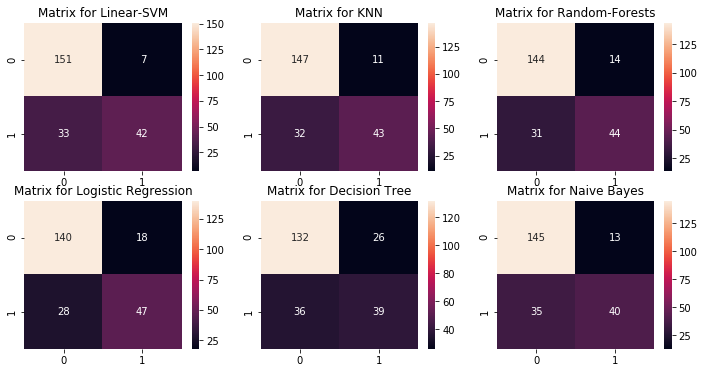

In [124]:
f,ax=plt.subplots(2,3,figsize=(12,6))
#y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
#sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
#ax[0,0].set_title('Matrix for rbf-SVM')
#y_pred = cross_val_predict(svm.SVC(kernel='linear'),x,y,cv=5)
sns.heatmap(confusion_matrix(test_y, predict_SVM),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for Linear-SVM')

#y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=5),x,y,cv=5)
sns.heatmap(confusion_matrix(test_y,prediction5),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for KNN')

#y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),x,y,cv=5)
sns.heatmap(confusion_matrix(test_y,prediction7),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for Random-Forests')

#y_pred = cross_val_predict(LogisticRegression(),x,y,cv=5)
sns.heatmap(confusion_matrix(test_y, predict),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Logistic Regression')

#y_pred = cross_val_predict(DecisionTreeClassifier(),x,y,cv=5)
sns.heatmap(confusion_matrix(test_y,prediction4),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Decision Tree')

#y_pred = cross_val_predict(GaussianNB(),x,y,cv=5)
sns.heatmap(confusion_matrix(test_y,prediction6),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [125]:
42/(42+33)

0.56

In [28]:
acc = {'classify':['Logistic Regression','Linear Svm','Decision Tree','KNN','Naive Bayes','LDA','Random Forest'],
      'accuracy':[80.26,82.83,73.39,81.55,79.40,77.68,80.69]}

In [29]:
df = pd.DataFrame(data=acc)
df

,classify,accuracy
0,Logistic Regression,80.26
1,Linear Svm,82.83
2,Decision Tree,73.39
3,KNN,81.55
4,Naive Bayes,79.40
5,LDA,77.68
6,Random Forest,80.69


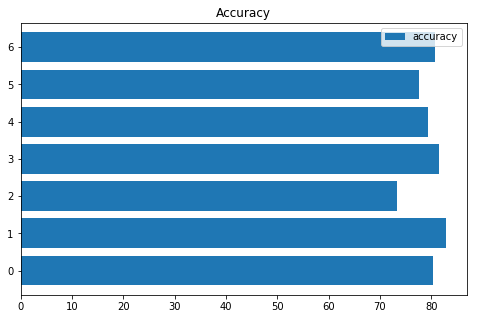

In [34]:
df.plot.barh(width=0.8)
plt.title('Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

In [37]:
#from sklearn.model_selection import cross_val_predict

# Voting Classifier（投票分类器）
### 加权平均概率 （软投票）

In [42]:
#平均的计算
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                             ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                             ('LR',LogisticRegression(C=0.05)),
                                             ('DT',DecisionTreeClassifier(random_state=0)),
                                             ('NB',GaussianNB()),
                                             ('svm',svm.SVC(kernel='linear',probability=True))
                                             ],
                                  voting='soft').fit(train_x,train_y)
print('The accuary for ensemble model is:',ensemble_lin_rbf.score(test_x,test_y))
#cross=cros_val_score(ensemble_lin_rbf,X,Y,cv=5,scoring='accuracy')
#print('The cross validated score is',cross.mean())

The accuary for ensemble model is: 0.8283261802575107


# Bagging meta-estimator（Bagging 元估计器）

In [47]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=5),random_state=0,n_estimators=700)
model.fit(train_x,train_y)
prediction=model.predict(test_x)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_y))
#result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
#print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.8111587982832618


In [48]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6),random_state=0,n_estimators=700)
model.fit(train_x,train_y)
prediction=model.predict(test_x)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_y))
#result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
#print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.8068669527896996


### Bagged DecisionTree

In [49]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_x,train_y)
prediction=model.predict(test_x)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_y))
#result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
#print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.7725321888412017


# AdaBoost

In [58]:
from sklearn.model_selection import cross_val_score
#from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier


clf = AdaBoostClassifier(n_estimators=100,random_state=0,learning_rate=0.1)
scores = cross_val_score(clf,x ,y,cv=5 )
scores.mean() 

0.8016512483332102

In [68]:
from sklearn.model_selection import cross_val_score
#from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier


clf = AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
scores = cross_val_score(clf,x ,y,cv=5 )
scores.mean() 

0.8016512483332102

In [60]:
from sklearn.model_selection import cross_val_score
#from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier


clf = AdaBoostClassifier(n_estimators=1000,random_state=0,learning_rate=0.1)
scores = cross_val_score(clf,x ,y,cv=5 )
scores.mean() 

0.7911439839812677

In [59]:
from sklearn.model_selection import cross_val_score
#from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier


clf = AdaBoostClassifier(n_estimators=100,random_state=0,learning_rate=0.1)
scores = cross_val_score(clf,x ,y,cv=10 )
scores.mean() 

0.8051688571177849

In [56]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,x,y,cv=5,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.7911440177304929


In [57]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=500,random_state=0,learning_rate=1)
result=cross_val_score(ada,x,y,cv=5,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.7658743361105571


# Gradient Tree Boosting（梯度树提升）

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,x,y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.7631540471031368


In [127]:
import matplotlib.pyplot as plt # import library (modules) we need for plot

In [126]:
acc = {'classify':['投票分类器','Bagging元估计器','Adaboost','梯度树提升'],
      'accuracy':[82.83,81.55,83.16,78.68]}

In [155]:
def set_ch(): 
    "在plot图中显示中文"
    from pylab import mpl
    mpl.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
    mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
    return
set_ch() # 显示中文在plot中

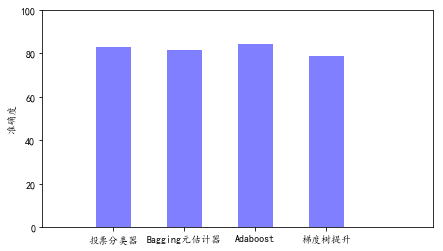

In [156]:
import matplotlib.pyplot as plt # import library (modules) we need for plot
%matplotlib inline
green_data = [82.83,81.55,84.16,78.68]
#blue_data = [3, 2, 1]
#red_data = [2, 3, 3]
labels = ['投票分类器', 'Bagging元估计器', 'Adaboost','梯度树提升']
 
width = 0.5
pos = list(range(len(green_data)))  # 0 1 2
 

# matplotlib.pyplot.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
# parameters not in before will be passed to fig_kw, which are parameters for figure():
# matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, **kwargs)
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(7,4))


    
    
    
# 请用matplotlib.pyplot.bar 画出绿色的条形图
pltg=plt.bar([p+width for p in pos],green_data,width,alpha=0.5,#optional kwargs,透明度
             color='b') 
                 

#画出蓝色的条形图 
#pltb=plt.bar([p+width*2 for p in pos],blue_data,width,alpha=1,#optional kwargs,透明度
#             color='b') 
#画出红色的条形图 
#pltr=plt.bar([p+width*2 for p in pos],red_data,width,alpha=1,#optional kwargs,透明度
#             color='r')
#用ax设置x，y的label（set_ylabel，set_xticks，set_xticklabels），图的title（set_title('Grouped bar plot')）
ax.set_ylabel('准确度')
#ax.set_title('Grouped bar plot')
ax.set_xticks([p+1*width for p in pos])
ax.set_xticklabels(labels)
#设定x轴的数值范围
plt.xlim(min(pos)-width,
        max(pos)+width*4)
#设定y轴的数值范围
plt.ylim([0,100]) 
#画出缩略示意图
#显示网格
plt.show()

                 

# Confusion Matrix for the Best Model

In [62]:
import seaborn as sns

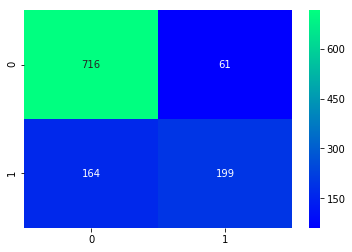

In [63]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,x,y,cv=10)
sns.heatmap(confusion_matrix(y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

In [65]:
(199+716)/(199+164+61+716)

0.8026315789473685

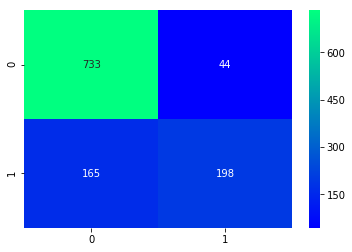

In [69]:
ada=AdaBoostClassifier(n_estimators=100,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,x,y,cv=10)
sns.heatmap(confusion_matrix(y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

# 交叉验证

In [70]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=5, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),LogisticRegression(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,x,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.814035,0.013187
Logistic Regression,0.805263,0.014307
KNN,0.782456,0.018105
Decision Tree,0.720175,0.061990
Naive Bayes,0.776316,0.011437
Random Forest,0.768421,0.034801


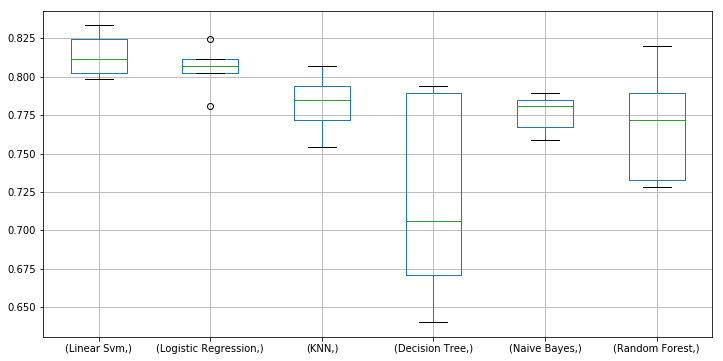

In [71]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

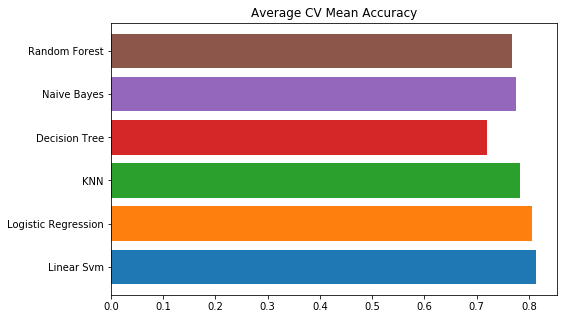

In [72]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

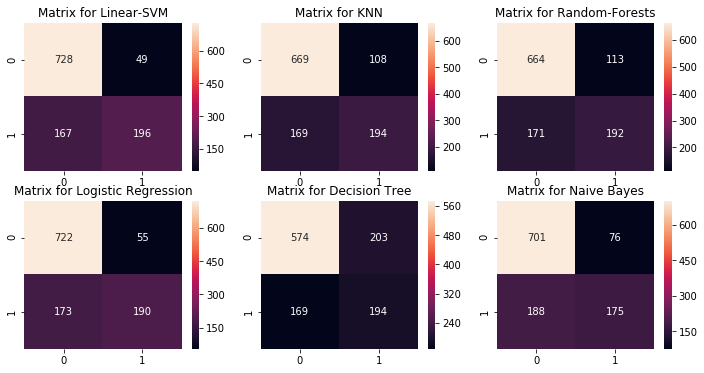

In [75]:
f,ax=plt.subplots(2,3,figsize=(12,6))
#y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
#sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
#ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),x,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=5),x,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),x,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),x,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),x,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),x,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [123]:
196/(196+167)

0.5399449035812672

# Logistic Regression优化版

In [78]:
#三大件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
pdData = data1.loc[:,['评论数','喜欢数','开发游戏个数','isdata','score']]

In [88]:
pdData.shape

(1140, 5)

In [89]:
pdData.head()

,评论数,喜欢数,开发游戏个数,isdata,score
0,6654,114,9,0,1
1,16190,3712,9,0,1
2,7187,280,4,0,0
3,9372,1608,1,0,0
4,8804,888,5,0,1


In [79]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [80]:
def model(X, theta):
    
    return sigmoid(np.dot(X, theta.T))

In [90]:
pdData.insert(0, 'Ones', 1) # in a try / except structure so as not to return an error if the block si executed several times


# set X (training data) and y (target variable)
orig_data = pdData.as_matrix() # convert the Pandas representation of the data to an array useful for further computations
cols = orig_data.shape[1]
X = orig_data[:,0:cols-1]
y = orig_data[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
#X = np.matrix(X.values)
#y = np.matrix(data.iloc[:,3:4].values) #np.array(y.values)
theta = np.zeros([1, 5])

In [94]:
X[:3]

array([[    1,  6654,   114,     9,     0],
       [    1, 16190,  3712,     9,     0],
       [    1,  7187,   280,     4,     0]], dtype=int64)

In [96]:
X[:2]

array([[    1,  6654,   114,     9,     0],
       [    1, 16190,  3712,     9,     0]], dtype=int64)

In [97]:
X.shape, y.shape, theta.shape

((1140, 5), (1140, 1), (1, 5))

In [98]:
def cost(X, y, theta):
    left = np.multiply(-y, np.log(model(X, theta)))
    right = np.multiply(1 - y, np.log(1 - model(X, theta)))
    return np.sum(left - right) / (len(X))

In [99]:
cost(X, y, theta)

0.6931471805599454

In [100]:
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X, theta)- y).ravel()
    for j in range(len(theta.ravel())): #for each parmeter
        term = np.multiply(error, X[:,j])
        grad[0, j] = np.sum(term) / len(X)
    
    return grad

In [101]:
STOP_ITER = 0
STOP_COST = 1
STOP_GRAD = 2

def stopCriterion(type, value, threshold):
    #设定三种不同的停止策略
    if type == STOP_ITER:        return value > threshold
    elif type == STOP_COST:      return abs(value[-1]-value[-2]) < threshold
    elif type == STOP_GRAD:      return np.linalg.norm(value) < threshold

In [102]:
import numpy.random
#洗牌
def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:, 0:cols-1]
    y = data[:, cols-1:]
    return X, y

In [103]:
import time

def descent(data, theta, batchSize, stopType, thresh, alpha):
    #梯度下降求解
    
    init_time = time.time()
    i = 0 # 迭代次数
    k = 0 # batch
    X, y = shuffleData(data)
    grad = np.zeros(theta.shape) # 计算的梯度
    costs = [cost(X, y, theta)] # 损失值

    
    while True:
        grad = gradient(X[k:k+batchSize], y[k:k+batchSize], theta)
        k += batchSize #取batch数量个数据
        if k >= n: 
            k = 0 
            X, y = shuffleData(data) #重新洗牌
        theta = theta - alpha*grad # 参数更新
        costs.append(cost(X, y, theta)) # 计算新的损失
        i += 1 

        if stopType == STOP_ITER:       value = i
        elif stopType == STOP_COST:     value = costs
        elif stopType == STOP_GRAD:     value = grad
        if stopCriterion(stopType, value, thresh): break
    
    return theta, i-1, costs, grad, time.time() - init_time

In [104]:
def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    #import pdb; pdb.set_trace();
    theta, iter, costs, grad, dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    if batchSize==n: strDescType = "Gradient"
    elif batchSize==1:  strDescType = "Stochastic"
    else: strDescType = "Mini-batch ({})".format(batchSize)
    name += strDescType + " descent - Stop: "
    if stopType == STOP_ITER: strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST: strStop = "costs change < {}".format(thresh)
    else: strStop = "gradient norm < {}".format(thresh)
    name += strStop
    print ("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return theta

***Original data - learning rate: 1e-06 - Gradient descent - Stop: 5000 iterations
Theta: [[-0.00130221  0.0003116  -0.00034516 -0.00497795 -0.00016313]] - Iter: 5000 - Last cost: 0.67 - Duration: 76.29s


array([[-0.00130221,  0.0003116 , -0.00034516, -0.00497795, -0.00016313]])

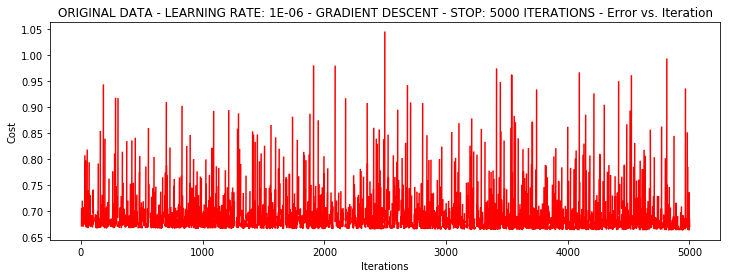

In [105]:
#选择的梯度下降方法是基于所有样本的
n=100
runExpe(orig_data, theta, n, STOP_ITER, thresh=5000, alpha=0.000001)

In [106]:
theta

array([[0., 0., 0., 0., 0.]])

In [108]:
pd.DataFrame(theta)

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0


In [109]:
best_c = 0.01

In [110]:
from sklearn.cross_validation import train_test_split
# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  798
Number transactions test dataset:  342
Total number of transactions:  1140


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report 

In [112]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


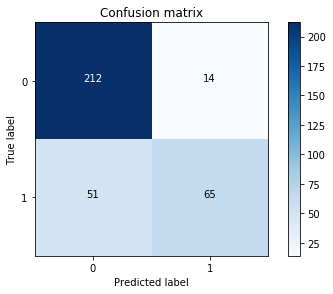

In [115]:
import itertools
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

#print("Recall metric in the testing dataset: ", float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [116]:
65/(51+65)

0.5603448275862069